# Import packages and data set

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import math
import sklearn

df = pd.read_csv("diabetic_data.csv")

# Drop columns and duplicates

In [3]:
df.drop('weight', axis = 1, inplace = True)
df.drop('payer_code', axis = 1, inplace = True)
df.drop('medical_specialty', axis = 1, inplace = True)
df.drop('encounter_id', axis = 1, inplace = True)
df.drop('race',axis=1,inplace=True)
df.drop_duplicates(['patient_nbr'], keep = 'first', inplace = True)

df

# Create a heat map to start visualizing features that may be import to visualize.

In [4]:
#sns.heatmap(df)

# For easier access and to also show if data set is imbalanced or balances, I seperated out the different readmissions, Then I found the length to show how much of each I had. I found my data set to be imbalance with almost double more no readmission paitents then readmitted. 

In [7]:
no_readmission = df[df.readmitted == 'NO']
less_than_thirty = df[df.readmitted == '<30']
more_than_thirty = df[df.readmitted == '>30']

33490

In [8]:
len(no_readmission)

42985

In [9]:
len(less_than_thirty)

6293

In [10]:
len(more_than_thirty)

22240

In [11]:
len(more_than_thirty)+len(less_than_thirty)

28533

# seperate out factors that share similarities or may be grouped together. I did this so visualizing and viewing the data set would be easier than trying to manage the whole thing during this process
https://www.diabetes.org/a1c

In [295]:
gender = df[['gender','readmitted']]

age = df[['age','readmitted']]

quality_of_visit = df[['time_in_hospital','num_lab_procedures','num_procedures','num_medications',
                    'discharge_disposition_id','number_diagnoses','diabetesMed','readmitted']]
A1C = df[['A1Cresult','readmitted']]
glucose = df[['max_glu_serum','readmitted']]

a1c_glucose_match = df[['A1Cresult','max_glu_serum','readmitted']]
#drop the nulls
a1c_glucose_match.dropna()
print(a1c_glucose_match)


        patient_nbr A1Cresult max_glu_serum readmitted
0           8222157      None          None         NO
1          55629189      None          None        >30
2          86047875      None          None         NO
3          82442376      None          None         NO
4          42519267      None          None         NO
...             ...       ...           ...        ...
101754    183087545        >7          None        >30
101755    188574944        >8          None        >30
101756    140199494      None          None        >30
101758    120975314      None          None         NO
101765    175429310      None          None         NO

[71518 rows x 4 columns]


# I personally wanted to see if there was a difference between men and women and reamission rates as well as if age played a possible role. While these factors were insignificant any factor that may play a role is important when it comes to someone quality of life. In previous studies, men are more likely to not go to doctors for medical care due to medical care, even in cases of basic health check-ups and labs. This is when medical conditons, such as diabetes, may be caught before a paitent begins to feel the negative impacts. This makes me wonder if this could be connected to readmission as men could be more likely to be admitted when their condition is worse and negative effects begin to take their toll on their overall health. To start reaching out of gender, I then wondered if the paitent was to have more dangerous impacts, such as kidney or heart damage being their reason for admission,  would this possibly lead to readmission at a sooner time as compared to someone who came in during early stages of diabetes.

# I chose to view the genders as seperate charts due to imbalance between gender samples

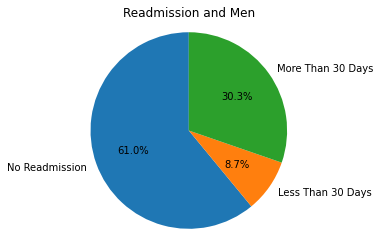

In [296]:
no_readmission_male = no_readmission[no_readmission.gender == 'Male']
less_than_thirty_male = less_than_thirty[less_than_thirty.gender == 'Male']
more_than_thirty_male = more_than_thirty[more_than_thirty.gender == 'Male']

male_readmission = [len(no_readmission_male),len(less_than_thirty_male),len(more_than_thirty_male)]

fig1, ax1 = plt.subplots()
plt.title('Readmission and Men')
ax1.pie(male_readmission, labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

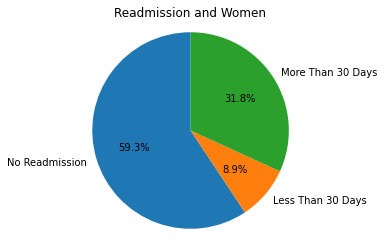

In [297]:
no_readmission_female = no_readmission[no_readmission.gender == 'Female']
less_than_thirty_female = less_than_thirty[less_than_thirty.gender == 'Female']
more_than_thirty_female = more_than_thirty[more_than_thirty.gender == 'Female']

female_readmission = [len(no_readmission_female),len(less_than_thirty_female),len(more_than_thirty_female)]

fig1, ax1 = plt.subplots()
plt.title('Readmission and Women')
ax1.pie(female_readmission, labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

# I did not see much of a readmission difference but even taking in the small difference, the reverse of what I thought was true. More women were to be readmitted them men. 


# Here is where I seperated out age groups to look at age groups. Older paitents are more prone to the effects of illness but younger children are more often diagnosed with Type 1 diabetes that can be harder to maintain while type 2 is more mild. Due to these factors I just wanted to see if there was any difference.

In [298]:
zero_to_ten = df[df.age == '[0-10)']
no_re_zero = no_readmission[no_readmission.age == '[0-10)']
less_zero = more_than_thirty[more_than_thirty.age == '[0-10)']
more_zero = less_than_thirty[less_than_thirty.age == '[0-10)']

ten_to_twenty = df[df.age == '[10-20)']
no_re_ten = no_readmission[no_readmission.age == '[10-20)']
less_ten = less_than_thirty[less_than_thirty.age == '[10-20)']
more_ten = more_than_thirty[more_than_thirty.age == '[10-20)']

twenty_to_thirty = df[df.age == '[20-30)']
no_re_twenty = no_readmission[no_readmission.age == '[20-30)']
less_twenty = less_than_thirty[less_than_thirty.age == '[20-30)']
more_twenty = more_than_thirty[more_than_thirty.age == '[20-30)']

thirty_to_fourty = df[df.age == '[30-40)']
no_re_thirty = no_readmission[no_readmission.age == '[30-40)']
less_thirty = less_than_thirty[less_than_thirty.age == '[30-40)']
more_thirty = more_than_thirty[more_than_thirty.age == '[30-40)']

fourty_to_fifty = df[df.age == '[40-50)']
no_re_fourty = no_readmission[no_readmission.age == '[40-50)']
less_fourty = less_than_thirty[less_than_thirty.age == '[40-50)']
more_fourty = more_than_thirty[more_than_thirty.age == '[40-50)']

fifty_to_sixty = df[df.age == '[50-60)']
no_re_fifty = no_readmission[no_readmission.age == '[50-60)']
less_fifty = less_than_thirty[less_than_thirty.age == '[50-60)']
more_fifty = more_than_thirty[more_than_thirty.age == '[50-60)']

sixty_to_seventy = df[df.age == '[60-70)']
no_re_sixty = no_readmission[no_readmission.age == '[60-70)']
less_sixty = less_than_thirty[less_than_thirty.age == '[60-70)']
more_sixty= more_than_thirty[more_than_thirty.age == '[60-70)']

seventy_to_eighty = df[df.age == '[70-80)']
no_re_seventy = no_readmission[no_readmission.age == '[70-80)']
less_seventy = less_than_thirty[less_than_thirty.age == '[70-80)']
more_seventy = more_than_thirty[more_than_thirty.age == '[70-80)']

eighty_to_ninety = df[df.age == '[80-90)']
no_re_eighty = no_readmission[no_readmission.age == '[80-90)']
less_eighty = less_than_thirty[less_than_thirty.age == '[80-90)']
more_eighty = more_than_thirty[more_than_thirty.age == '[80-90)']

ninety_to_hundred = df[df.age == '[90-100)']
no_re_ninety = no_readmission[no_readmission.age == '[90-100)']
less_ninety = less_than_thirty[less_than_thirty.age == '[90-100)']
more_ninety = more_than_thirty[more_than_thirty.age == '[90-100)']

age_groups = ['0 to 10','10 to 19','20 to 29','30 to 39','40 to 49','50 to 59','60 to 69','70 to 79','80 to 89','90 to 99']
age_totals = [zero_to_ten, ten_to_twenty, twenty_to_thirty, thirty_to_fourty, fourty_to_fifty, fifty_to_sixty, 
             sixty_to_seventy, seventy_to_eighty, eighty_to_ninety, ninety_to_hundred]
age_no = [no_re_zero, no_re_ten, no_re_twenty, no_re_thirty,no_re_fourty,no_re_fifty,no_re_sixty, no_re_seventy, no_re_eighty
         ,no_re_ninety]
age_less = [less_zero,less_ten,less_twenty,less_thirty,less_fourty,less_fifty,less_sixty,less_seventy,less_eighty,less_ninety]
age_more = [more_zero,more_ten,more_twenty,more_thirty,more_fourty,more_fifty,more_sixty,more_seventy,more_eighty,more_ninety]




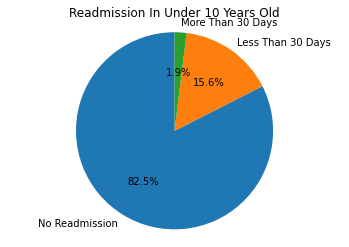

In [300]:
fig1, ax1 = plt.subplots()
plt.title('Readmission In Under 10 Years Old')
ax1.pie([len(no_re_zero),len(less_zero),len(more_zero)], labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

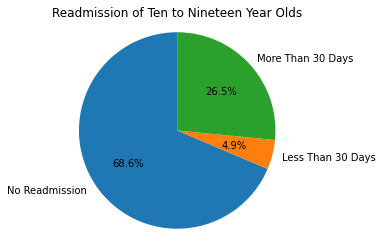

In [301]:
fig1, ax1 = plt.subplots()
plt.title('Readmission of Ten to Nineteen Year Olds')
ax1.pie([len(no_re_ten),len(less_ten),len(more_ten)], labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

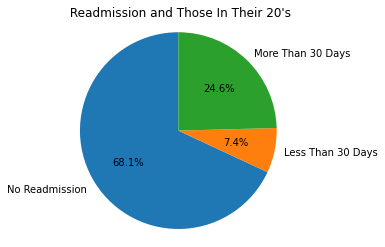

In [302]:
fig1, ax1 = plt.subplots()
plt.title(" Readmission and Those In Their 20's")
ax1.pie([len(no_re_twenty),len(less_twenty),len(more_twenty)], labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

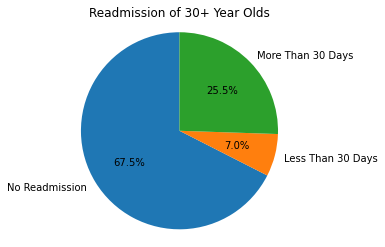

In [303]:
fig1, ax1 = plt.subplots()
plt.title('Readmission of 30+ Year Olds')
ax1.pie([len(no_re_thirty),len(less_thirty),len(more_thirty)], labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

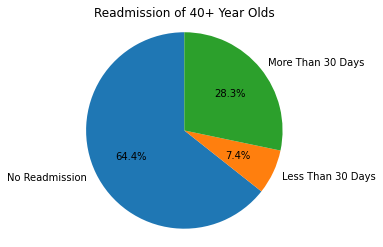

In [304]:
fig1, ax1 = plt.subplots()
plt.title('Readmission of 40+ Year Olds')
ax1.pie([len(no_re_fourty),len(less_fourty),len(more_fourty)], labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

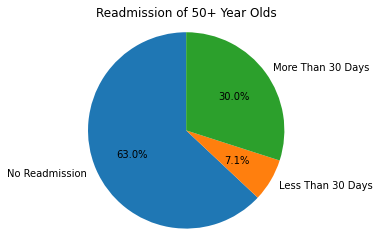

In [305]:
fig1, ax1 = plt.subplots()
plt.title('Readmission of 50+ Year Olds')
ax1.pie([len(no_re_fifty),len(less_fifty),len(more_fifty)], labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

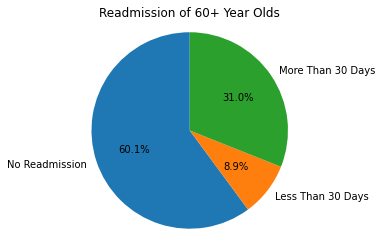

In [306]:
fig1, ax1 = plt.subplots()
plt.title('Readmission of 60+ Year Olds')
ax1.pie([len(no_re_sixty),len(less_sixty),len(more_sixty)], labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

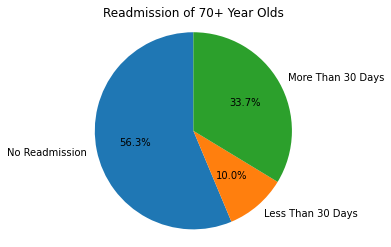

In [307]:
fig1, ax1 = plt.subplots()
plt.title('Readmission of 70+ Year Olds')
ax1.pie([len(no_re_seventy),len(less_seventy),len(more_seventy)], labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

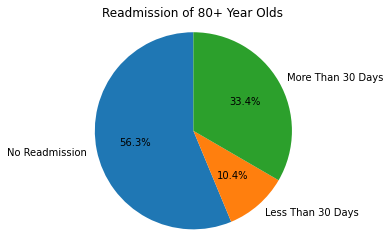

In [308]:
fig1, ax1 = plt.subplots()
plt.title('Readmission of 80+ Year Olds')
ax1.pie([len(no_re_eighty),len(less_eighty),len(more_eighty)], labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

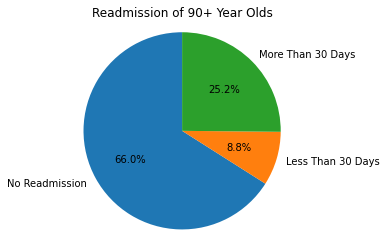

In [309]:
fig1, ax1 = plt.subplots()
plt.title('Readmission of 90+ Year Olds')
ax1.pie([len(no_re_ninety),len(less_ninety),len(more_ninety)], labels=['No Readmission','Less Than 30 Days','More Than 30 Days'], autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.show()

# At the end, younger paitents actually experiance a high no readmission precentage. Along with the, from ages 10+, there wasn't much differentiation in readmission vs no readmission including older paitents. 

In [319]:
df.drop('patient_nbr', axis = 1, inplace = True)
df.replace('No',0, regex=True,inplace=True)
df.replace({'Ch': 1}, regex=True,inplace=True)
df.replace({'Up': 2}, regex=True,inplace=True)
df.replace({'Steady': 1}, regex=True,inplace=True)
df.replace({'Yes': 3 }, regex=True,inplace=True)
df.replace({'>200': 4 }, regex=True,inplace=True)
df.replace({'>300': 5 }, regex=True,inplace=True)
df.replace({'>7': 7 }, regex=True,inplace=True)
df.replace({'>8': 8 }, regex=True,inplace=True)
df.replace({'Down': 6 }, regex=True,inplace=True)


In [320]:
df.gender.replace('Male',1,inplace=True)
df.gender.replace('Female',2,inplace=True)
df.gender.replace('Unknown/Invalid',0,inplace=True)

In [321]:
df.age.replace('[0-10)',0,inplace=True)
df.age.replace('[10-20)',1,inplace=True)
df.age.replace('[20-30)',2,inplace=True)
df.age.replace('[30-40)',3,inplace=True)
df.age.replace('[40-50)',4,inplace=True)
df.age.replace('[50-60)',5,inplace=True)
df.age.replace('[60-70)',6,inplace=True)
df.age.replace('[70-80)',7,inplace=True)
df.age.replace('[80-90)',8,inplace=True)
df.age.replace('[90-100)',9,inplace=True)
df

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,6,25,1,1,41,0,1,0,...,0,0,0,0,0,0,0,0,0,NO
1,2,1,1,1,7,3,59,0,18,0,...,0,2,0,0,0,0,0,1,3,>30
2,2,2,1,1,7,2,11,5,13,2,...,0,0,0,0,0,0,0,0,3,NO
3,1,3,1,1,7,2,44,1,16,0,...,0,2,0,0,0,0,0,1,3,NO
4,1,4,1,1,7,1,51,0,8,0,...,0,1,0,0,0,0,0,1,3,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,2,7,1,1,7,9,50,2,33,0,...,0,1,0,0,0,0,0,1,3,>30
101755,2,4,1,1,7,14,73,6,26,0,...,0,2,0,0,0,0,0,1,3,>30
101756,2,6,1,1,7,2,46,6,17,1,...,0,1,0,0,0,0,0,0,3,>30
101758,2,8,1,1,7,5,76,1,22,0,...,0,2,0,0,0,0,0,1,3,NO


In [322]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

df.diag_1= le.fit_transform(df.diag_1)
df.diag_2= le.fit_transform(df.diag_2)
df.diag_3= le.fit_transform(df.diag_3)

second_test = df.copy()

In [323]:
df['readmitted'].replace('NO',0,inplace = True)
df['readmitted'].replace('<30',1,inplace= True)
df['readmitted'].replace('>30',2,inplace=True)

second_test

,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2,0,6,25,1,1,41,0,1,0,...,0,0,0,0,0,0,0,0,0,NO
1,2,1,1,1,7,3,59,0,18,0,...,0,2,0,0,0,0,0,1,3,>30
2,2,2,1,1,7,2,11,5,13,2,...,0,0,0,0,0,0,0,0,3,NO
3,1,3,1,1,7,2,44,1,16,0,...,0,2,0,0,0,0,0,1,3,NO
4,1,4,1,1,7,1,51,0,8,0,...,0,1,0,0,0,0,0,1,3,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101754,2,7,1,1,7,9,50,2,33,0,...,0,1,0,0,0,0,0,1,3,>30
101755,2,4,1,1,7,14,73,6,26,0,...,0,2,0,0,0,0,0,1,3,>30
101756,2,6,1,1,7,2,46,6,17,1,...,0,1,0,0,0,0,0,0,3,>30
101758,2,8,1,1,7,5,76,1,22,0,...,0,2,0,0,0,0,0,1,3,NO


# Apply the Random Forest Model with help in understanding the process with 
https://www.datacamp.com/community/tutorials/random-forests-classifier-python

In [324]:
from sklearn.model_selection import train_test_split

X=df[['gender','age', 'discharge_disposition_id', 'time_in_hospital','num_lab_procedures','num_medications','number_outpatient',
     'number_emergency','number_inpatient','number_diagnoses','max_glu_serum','A1Cresult','diabetesMed','change','metformin','repaglinide'
     ,'nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone'
     ,'acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin'
     ,'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','admission_source_id','admission_type_id','diag_1',
     'diag_2','diag_3']] 

y=df['readmitted']  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [325]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=200)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

# See accuracy of model

In [327]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=['not readmitted','<30 days','>30 days']))

                precision    recall  f1-score   support

not readmitted       0.63      0.93      0.75     12896
      <30 days       0.31      0.00      0.00      1797
      >30 days       0.51      0.18      0.27      6763

      accuracy                           0.62     21456
     macro avg       0.48      0.37      0.34     21456
  weighted avg       0.56      0.62      0.54     21456



In [328]:
second_test['readmitted'].replace('NO',0,inplace = True)
second_test['readmitted'].replace('<30',1,inplace= True)
second_test['readmitted'].replace('>30',1,inplace=True)
second_test['readmitted']

0         0
1         1
2         0
3         0
4         0
         ..
101754    1
101755    1
101756    1
101758    0
101765    0
Name: readmitted, Length: 71518, dtype: int64

In [329]:
second_test['readmitted'].replace('NO',0,inplace = True)
second_test['readmitted'].replace('<30',1,inplace= True)
second_test['readmitted'].replace('>30',1,inplace=True)


X=second_test[['gender','age', 'discharge_disposition_id', 'time_in_hospital','num_lab_procedures','num_medications','number_outpatient',
     'number_emergency','number_inpatient','number_diagnoses','max_glu_serum','A1Cresult','diabetesMed','change','metformin','repaglinide'
     ,'nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone'
     ,'acarbose','miglitol','troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin'
     ,'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','admission_source_id','admission_type_id','diag_1',
     'diag_2','diag_3']] 

y=second_test['readmitted']  

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


clf=RandomForestClassifier(n_estimators=200)

clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print(classification_report(y_test, y_pred, target_names=['not readmitted','readmitted']))

                precision    recall  f1-score   support

not readmitted       0.66      0.85      0.74     12973
    readmitted       0.58      0.32      0.41      8483

      accuracy                           0.64     21456
     macro avg       0.62      0.58      0.58     21456
  weighted avg       0.63      0.64      0.61     21456



# See what features are important

In [330]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


RandomForestClassifier(n_jobs=1)

In [331]:
importance = pd.Series(clf.feature_importances_,index=df2).sort_values(ascending=False)
importance

num_lab_procedures          0.110651
diag_1                      0.105578
diag_2                      0.103277
diag_3                      0.099884
num_medications             0.095790
time_in_hospital            0.066620
age                         0.053023
number_diagnoses            0.046924
discharge_disposition_id    0.044590
admission_type_id           0.031383
insulin                     0.027742
admission_source_id         0.025684
number_inpatient            0.022708
gender                      0.020613
number_outpatient           0.016740
metformin                   0.016719
A1Cresult                   0.015083
glipizide                   0.013272
glyburide                   0.012947
change                      0.012187
number_emergency            0.011405
pioglitazone                0.009539
rosiglitazone               0.008585
glimepiride                 0.008331
diabetesMed                 0.008306
max_glu_serum               0.003914
repaglinide                 0.003093
g

No handles with labels found to put in legend.


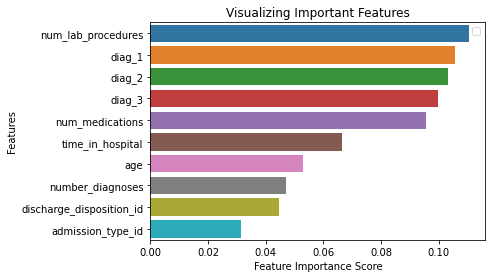

In [332]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=importance[:10], y=importance[:10].index)
# Add lnabels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()